In [1]:
import pandas as pd
data = pd.read_csv('out2 ccopy 2.csv')
data

,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.500,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,0.200,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.000,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,0.255,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,0.850,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,0.000,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [2]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [3]:
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

R2: 0.8690000083748994
RMSE: 4.388364195666107
r: (0.5711099442418073, 0.020847097501238167)
MAE: 3.5450593090057376
R2b: 0.2501008495942195
MSE: 19.257740313804234


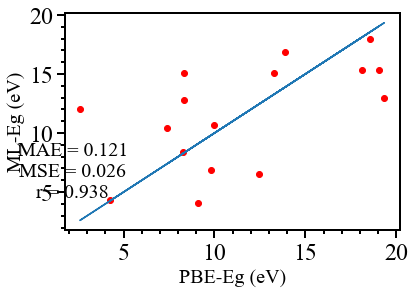

In [4]:
#计算准确率xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

clf = XGBRegressor(n_estimators=2000, max_depth=100, eta=0.1, gamma=0, subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()

plt.xlabel("PBE-Eg (eV)", fontproperties = 'Times New Roman', size = 20)
plt.ylabel("ML-Eg (eV)", fontproperties = 'Times New Roman', size = 20)

plt.text(2.2, 2.8, 'MAE = 0.121\nMSE = 0.026\nr = 0.938\n', fontproperties = 'Times New Roman', size = 20, horizontalalignment='center')
plt.savefig('xgboost-test.tif', dpi=300, bbox_inches = 'tight')
plt.show()

R2: -0.051943798701875155
RMSE: 12.435501320547115
r: (0.1429846140783028, 0.5973108006627567)
MAE: 8.729252507748342
R2b: -5.021769552312063
MSE: 154.64169309332902


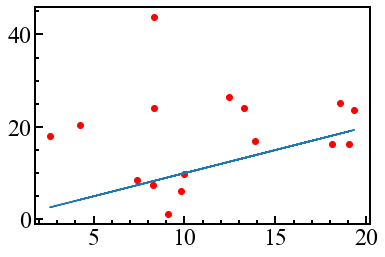

In [6]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', activation='relu', learning_rate_init=0.01,alpha=0.0001,max_iter=200000, hidden_layer_sizes=(200,200))

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(10000)
yminorLocator   = MultipleLocator(10000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

In [7]:
data

,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.500,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,0.200,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.000,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,0.255,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,0.850,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,0.000,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [18]:
# from Prediction_class import autoin  as pc
# a = ['CH5N2','CH3NH3','Rb']#'Sc','MA','FA','CA','GU','PEA'
# b = ['Pb','Sn']#,'Bi'
# c = ['Cl','Br']#,'I'
# pc.predictioinclass(a,b,c,0.1,"outt.csv")
# data['CH5N2-radius']=df5['a3']-df5['c1']
# data.insert(loc = 1 ,column = 'CH5N2-radius', value=100)
# data = data.drop('CH5N2-radius',axis=1)
data

,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.500,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,0.200,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.000,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,0.255,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,0.850,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,0.000,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [19]:
data.insert(loc = 0 ,column = 'CH5N2-radius', value=100)

In [20]:
data

,CH5N2-radius,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,100,0.500,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,100,0.200,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,100,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,100,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,100,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,100,0.000,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,100,0.255,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,100,0.850,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,100,0.000,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [22]:
data.insert(loc = 2 ,column = 'CH3NH3-radius', value=105)
data

,CH5N2-radius,CH5N2,CH3NH3-radius,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,100,0.500,105,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,100,0.200,105,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,100,0.000,105,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,100,0.000,105,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,100,0.000,105,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,100,0.000,105,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,100,0.255,105,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,100,0.850,105,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,100,0.000,105,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [23]:
data = data.drop('CH5N2-radius',axis=1)

In [24]:
data

,CH5N2,CH3NH3-radius,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.500,105,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,0.200,105,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,0.000,105,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,0.000,105,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,0.000,105,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.000,105,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,0.255,105,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,0.850,105,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,0.000,105,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [25]:
data = data.drop('CH3NH3-radius',axis=1)

In [26]:
data

,CH5N2,CH3NH3,Rb,Cs,Pb,Sn,I,Br,ETL density(g/cm3),ETL Bandgap(eV),ETL HOMO(eV),ele Molecular Weight,glass Work function,PCE
0,0.500,0.500,0.0,0.00,1.0,0.0,1.5,1.5,6.61,0.65,5.521,107.86800,4.50,20.50
1,0.200,0.400,0.0,0.40,1.0,0.0,1.5,0.0,3.62,2.68,1.367,107.86800,4.50,20.10
2,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,19.04
3,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,5.44,0.72,0.840,107.86800,4.50,18.82
4,0.000,1.000,0.0,0.00,1.0,0.0,3.0,0.0,6.61,0.65,5.521,107.86800,4.50,18.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.000,1.000,0.0,0.00,1.0,0.0,1.5,0.0,3.62,2.68,1.367,196.96657,4.50,8.29
74,0.255,0.595,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,17.60
75,0.850,0.000,0.0,0.15,1.0,0.0,3.0,0.0,3.62,2.68,1.367,107.86800,4.50,13.90
76,0.000,0.000,0.0,1.00,1.0,0.0,0.0,3.0,3.62,2.68,1.367,107.86800,4.57,7.93


In [27]:
from Prediction_class import autoin  as pc
a = ['CH5N2','CH3NH3','Rb','Cs']#'Sc','MA','FA','CA','GU','PEA'
b = ['Pb','Sn']#,'Bi'
c = ['I','Br']#,'I'
pc.predictioinclass(a,b,c,0.1,"outt.csv")

A位组合总样本： ['CH5N2', 'CH3NH3', 'Rb', 'Cs']
A位样本总数为： ['CH5N2', 'CH3NH3', 'Rb', 'Cs', 'CH5N2,CH3NH3', 'CH5N2,Rb', 'CH5N2,Cs', 'CH3NH3,Rb', 'CH3NH3,Cs', 'Rb,Cs', 'CH5N2,CH3NH3,Rb', 'CH5N2,CH3NH3,Cs', 'CH5N2,Rb,Cs', 'CH3NH3,Rb,Cs']
B位组合总样本： ['Pb', 'Sn']
B位样本总数为： ['Pb', 'Sn', 'Pb,Sn']
C位组合总样本： ['I', 'Br']
C位样本总数为： ['I', 'Br', 'I,Br']
